In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading titanic dataset from github
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#checking the shape of the datset
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


observation: this dataset contains 7 numerical variables(discrete and continuous) and 5 
    categorical variables.

In [5]:
#checking the null values present in the datset
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

observation: features age, cabin and embarked have null values, we need to impute those null values
    with mean, median or mode.

In [6]:
#seperating the numerical variables from categorical variables
numerical_feature = [feature for feature in data.columns if data[feature].dtype!='O']
numerical_feature

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [7]:
#finding out the categorical features
categorical_feature = [feature for feature in data.columns if data[feature].dtype=='O']
categorical_feature

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [8]:
#discrete features
discrete_features = [feature for feature in data.columns if data[feature].nunique()<15]
discrete_features

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [9]:
#continuous features
continuous_features = [feature for feature in data.columns if feature not in categorical_feature+discrete_features+['PassengerId']]
continuous_features

['Age', 'Fare']

In [10]:
#imputing the missing values present in the age feature
mean = data.Age.mean()
data.Age.fillna(mean, inplace=True)

In [11]:
#imputing Embarked column with mode
mode = data.Embarked.mode()
data.Embarked.fillna(mode, inplace=True)

In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#importing missingno to see the missing values graphically
import missingno as msno

<AxesSubplot:>

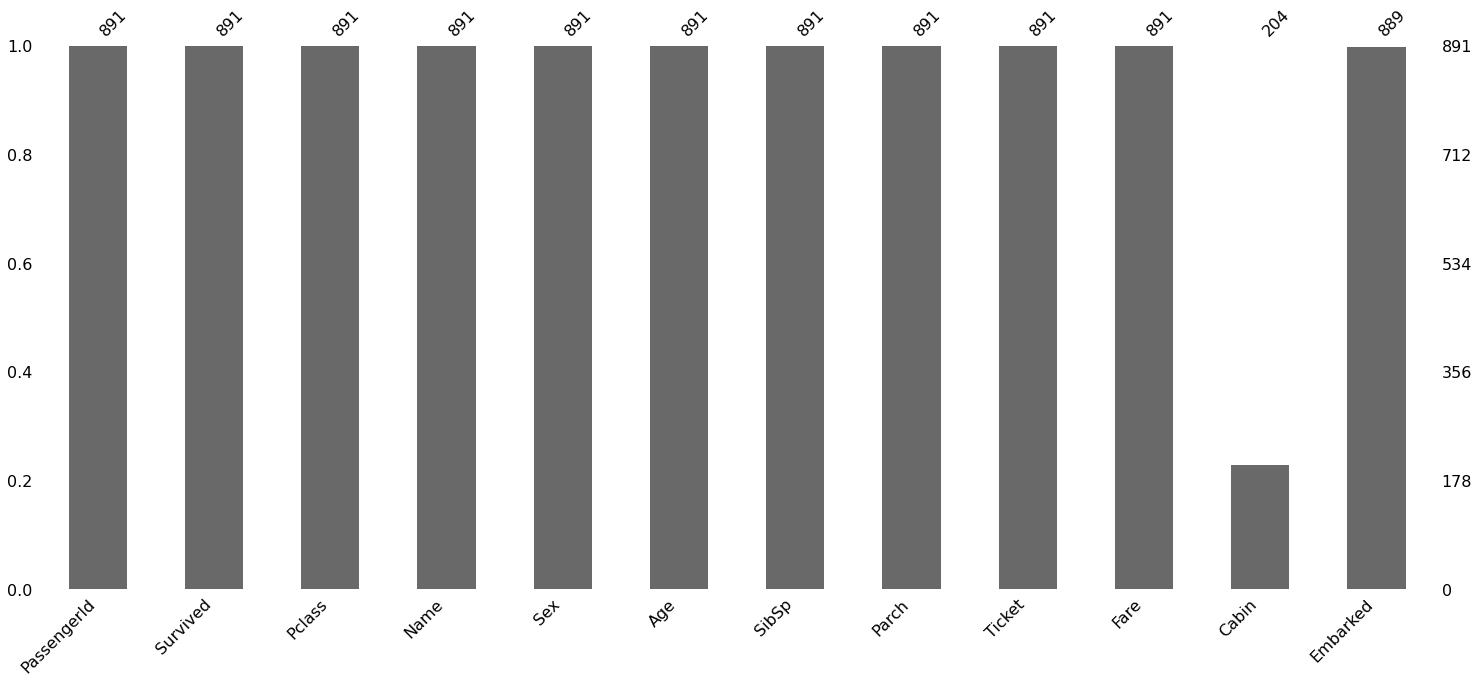

In [14]:
#missing value representation using bar graph
msno.bar(data)

# observation: dropping the cabin feature from the data

In [15]:
data.drop('Cabin', axis=1, inplace=True)

In [16]:
#importing probability plot 
from scipy.stats import probplot

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


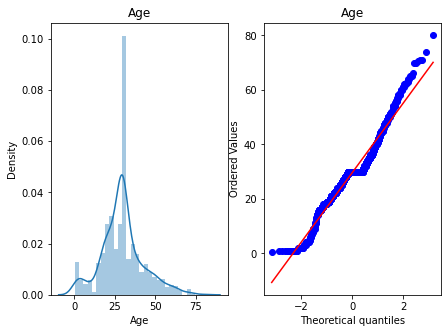

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


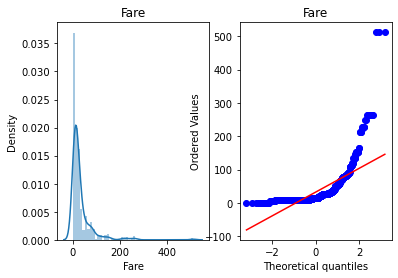

In [17]:
#univariate analysis of continuous features 
#drawing distplot to see the distribution of the features
plt.figure(figsize=(7,5))
for feature in continuous_features:
    plt.subplot(1,2,1)
    sns.distplot(data[feature])
    plt.title(feature)
    plt.subplot(1,2,2)
    probplot(x=data[feature], dist='norm', fit=True, plot=plt)
    plt.title(feature)
    plt.show()

# observation

1.Age feature is normally distributed

2. Fare is rightly skewed (apply lognormal to make it normally distributed feature)

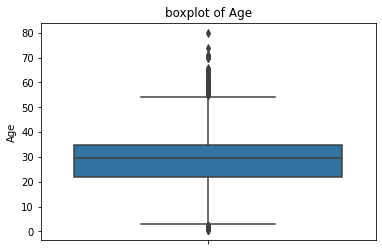

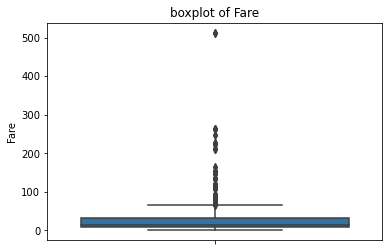

In [18]:
# see the number of outliers present in the dataset by drawing boxplot
for feature in continuous_features:
    sns.boxplot(y=data[feature])
    plt.title('boxplot of {}'.format(feature))
    plt.show()

# observation

As you can see there are large amount of extreme outliers present in the both features on the 
upper side. we can remove the outliers by applying quantile methods.

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

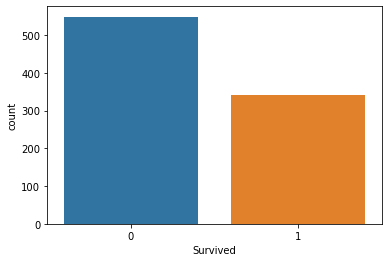

In [19]:
#checking the target variable to see the balance and imbalance of the dataset
sns.countplot(data.Survived)

# observation

There is not much variation in this dataset. but the people who survived are less than the 
people whi lost their lives.

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

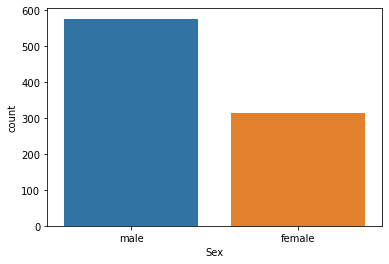

In [20]:
#countplot of sex feature
sns.countplot(data.Sex)

# observation

There were more number of male passengers than the feamle passengers in the cruise ship.

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

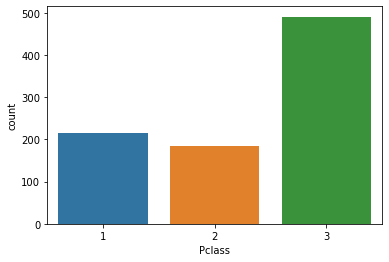

In [21]:
#countplot of passenger class
sns.countplot(data.Pclass)

# observation

Most of the passengers are belonged to 3rd class.

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

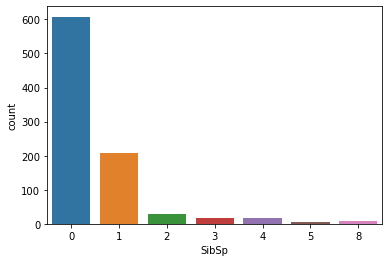

In [22]:
#countplot on siblings and spouse
sns.countplot(data.SibSp)

# observation

The passengers who came without siblings or spouse are more.

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

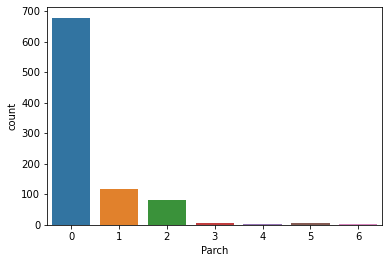

In [23]:
#countplot of parents and children
sns.countplot(data.Parch)

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

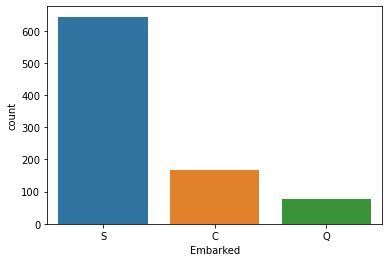

In [24]:
#countplot of embarked feature
sns.countplot(data.Embarked)

# observation

Most of the passengers who started their journey from 's' embarkment.

Imbalance in almost all of the categorical variables.

# Multivariate Analysis

Text(0.5, 1.0, 'Survived vs Age')

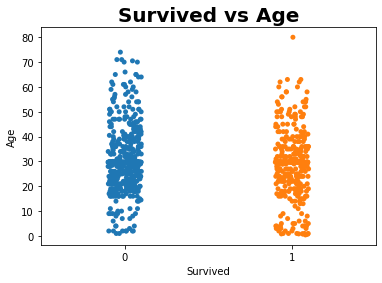

In [25]:
#stripplot to see the comparison between numerical and categorical features
sns.stripplot(x=data.Survived, y=data.Age)
plt.title('Survived vs Age', fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Survived vs Fare')

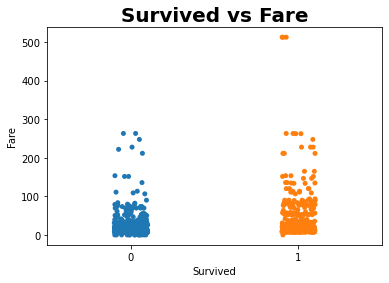

In [26]:
sns.stripplot(x=data.Survived, y=data.Fare)
plt.title('Survived vs Fare', fontsize=20, fontweight='bold')

<AxesSubplot:xlabel='Age', ylabel='Survived'>

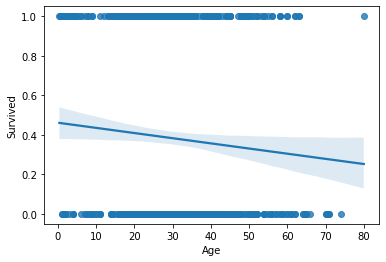

In [27]:
#drawing regplot to see any trends
sns.regplot(x=data.Age, y=data.Survived)

# observation

Survival rate is less when the passenger's age increases.

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare', ylabel='Survived'>

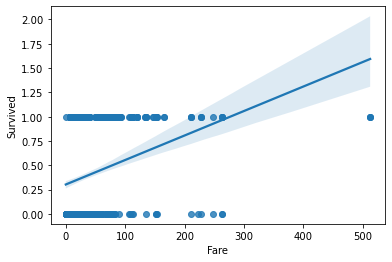

In [28]:
sns.regplot(data.Fare, data.Survived)

# observation

Fare is showing upward trend that means if the fare is high than the survival rate also high.

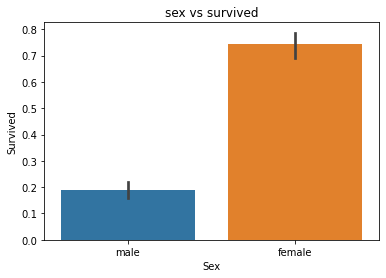

In [29]:
#comparing sex with survival feature
sns.barplot(x=data.Sex, y=data.Survived)
plt.title('sex vs survived')
plt.show()

observation: female passengers are survived more than the male passengers

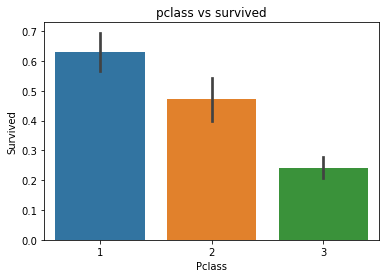

In [30]:
#comparing passenger class with survival rate
sns.barplot(x=data.Pclass, y=data.Survived)
plt.title('pclass vs survived')
plt.show()

observation: more number of 1st class passengers are survived following 2nd class. 
    the survival of 3rd class passengers are comparitevely low.

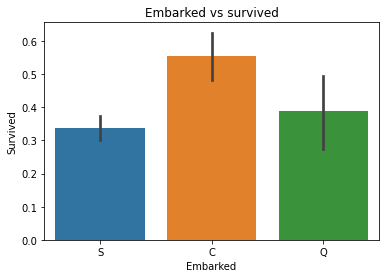

In [31]:
#comparing embarked with survival rate
sns.barplot(x=data.Embarked, y=data.Survived)
plt.title('Embarked vs survived')
plt.show()

observation: passengers who started their jpourney from 'C' has more survival rate

Text(0.5, 1.0, 'age vs fare')

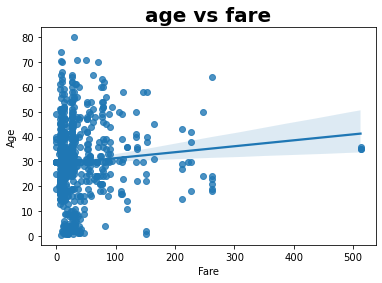

In [32]:
#comaprison between age and fare
sns.regplot(y=data.Age, x=data.Fare)
plt.title('age vs fare', fontsize=20, fontweight='bold')

In [33]:
data[continuous_features].corr()

,Age,Fare
Age,1.000000,0.091566
Fare,0.091566,1.000000


<AxesSubplot:>

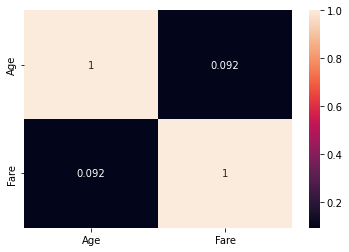

In [34]:
#heatmap to see the corelation
sns.heatmap(data[continuous_features].corr(), annot=True)

observation: There is no corelation between age and fare

In [35]:
from scipy.stats import chi2_contingency

In [36]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [37]:
discrete_features

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [38]:
data.drop(['PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)

In [39]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [40]:
#importing logistic regression
from sklearn.linear_model import LogisticRegression

In [41]:
#creating object for logistic regression
logi = LogisticRegression()

In [42]:
#one hot encoding on sex feature
data['Sex'] = data.Sex.map({'male':1, 'female':0})

In [43]:
#fixing the null values of embarked feature with its mediab
data.Embarked.replace(np.nan, 'Q', inplace=True)

In [44]:
#applying one hot encoding on embarked featiure
data['Embarked'] = data.Embarked.map({'S':0, 'C':1, 'Q':2})

In [45]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,0
1,1,1,0,38.000000,1,0,71.2833,1
2,1,3,0,26.000000,0,0,7.9250,0
3,1,1,0,35.000000,1,0,53.1000,0
4,0,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0
887,1,1,0,19.000000,0,0,30.0000,0
888,0,3,0,29.699118,1,2,23.4500,0
889,1,1,1,26.000000,0,0,30.0000,1


In [46]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [47]:
#importing train test split to split the dataset
from sklearn.model_selection import train_test_split

In [48]:
#creating x independent variables
x= data.drop('Survived', axis=1)

In [49]:
#creating target variable that is survived feature
y = data.Survived

In [50]:
#checking the shape of the x and y features
x.shape, y.shape

((891, 7), (891,))

In [51]:
#creating features x_train, x_test, y_train and y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

In [52]:
#shape of training and testing variables
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [53]:
#fitting the model by passing the train variables
logi.fit(x_train, y_train)

LogisticRegression()

In [54]:
#coefficient of the training model
logi.coef_

array([[-1.03369612e+00, -2.58771695e+00, -3.50188580e-02,
        -2.85081050e-01, -9.31386456e-03,  2.03874667e-03,
         2.87057866e-01]])

In [55]:
#intercept of the training model
logi.intercept_

array([4.42043227])

In [56]:
#now predicting the model by passing x_test variables
y_pred = logi.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0], dtype=int64)

# accuracy 

In [57]:
#importing necessary metrics
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, roc_auc_score, confusion_matrix

In [58]:
#accuracy score of the model
round(accuracy_score(y_test, y_pred), 2)

0.78

In [59]:
#confusion matrix
confuse = confusion_matrix(y_test, y_pred)
confuse

array([[93, 15],
       [24, 47]], dtype=int64)

In [60]:
true_positive = confuse[0][0]
false_positive = confuse[0][1]
false_negative = confuse[0][1]
true_negative = confuse[1][1]

In [61]:
print ('true_postive: ', true_positive, '\nfalse_positive:', false_positive, '\ntrue_negative:', true_negative, 
      '\nfalse_negative:', false_negative)

true_postive:  93 
false_positive: 15 
true_negative: 47 
false_negative: 15


In [62]:
#classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       108
           1       0.76      0.66      0.71        71

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



In [63]:
#importing roc curve 
from sklearn.metrics import plot_roc_curve

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


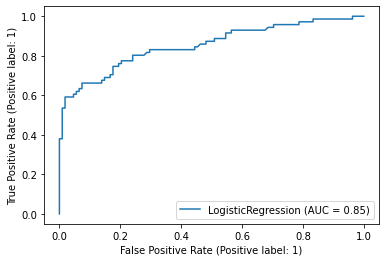

In [64]:
plot_roc_curve(logi, x_test, y_test)

In [65]:
#importing precision score of the model
from sklearn.metrics import precision_score

In [66]:
#precision score by sklearn
round(precision_score(y_test, y_pred), 2)

0.76

In [67]:
#calculating preccision score manually
precision = true_positive/(true_positive+false_positive)
round(precision, 2)

0.86

In [68]:
#recall score by skleran
round(recall_score(y_test, y_pred), 2)

0.66

In [69]:
#calculating recall score manually
recall = true_positive/(true_positive+false_negative)
round(recall, 2)

0.86

In [70]:
#f1 score by sklearn
round(f1_score(y_test, y_pred),2)

0.71

In [71]:
#calculating f1 score manually 
f1_score = 2*(precision*recall)/(precision+recall)
round(f1_score, 2)

0.86

In [72]:
#importing roc_curve
from sklearn.metrics import roc_curve

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

Text(0, 0.5, 'True positive rate')

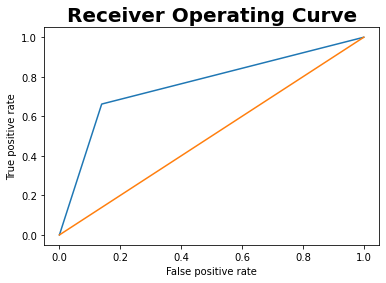

In [74]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.title('Receiver Operating Curve', fontsize=20, fontweight='bold')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

observation

The roc curve is leading towards positive direction so the model is good fit.